# Least Square Fitting Method: Example

In [10]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt


In [26]:
# Define the data points (including outlier)
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 4, 5, 4, 5, 10])
def residuals(params, x , y): 
    m , b = params 
    return y - (m * x + b) 

# Identify the index of the outlier (let's assume it's the last data point)
outlier_index = len(x) - 1

# Remove the outlier from the x and y arrays
x_no_outlier = np.delete(x, outlier_index)
y_no_outlier = np.delete(y, outlier_index)

# Perform the least squares fit without the outlier
result_no_outlier  = least_squares(residuals, [1, 1], args=(x_no_outlier, y_no_outlier))
m_no_outlier, b_no_outlier = result_no_outlier.x

# Perform the least squares fit with the outlier
result_with_outlier = least_squares(residuals, [1, 1], args=(x, y))
m_with_outlier, b_with_outlier = result_with_outlier.x

# Print the results
print("m (no outlier) = ", m_no_outlier)
print("b (no outlier) = ", b_no_outlier)
print("m (with outlier) = ", m_with_outlier)
print("b (with outlier) = ", b_with_outlier)


m (no outlier) =  0.6000000000000002
b (no outlier) =  2.1999999999999993
m (with outlier) =  1.2
b (with outlier) =  0.8000000000000003


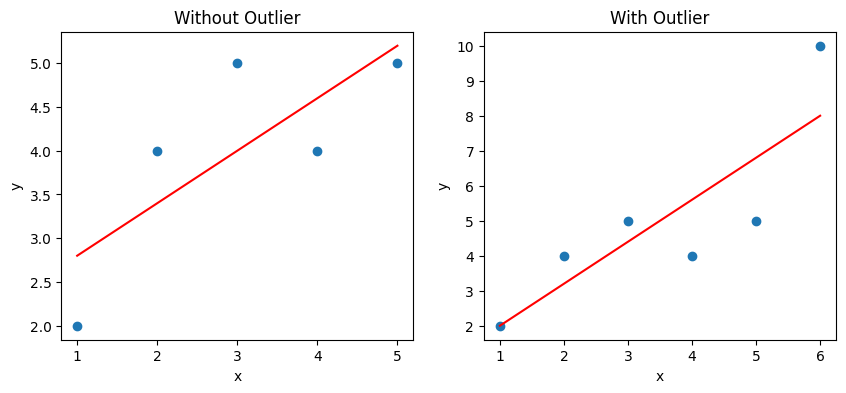

In [27]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot the data points and the line of best fit without the outlier
ax[0].scatter(x[:-1], y[:-1])
ax[0].plot(x[:-1], m_no_outlier*x[:-1] + b_no_outlier, '-r')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Without Outlier')

# Plot the data points and the line of best fit with the outlier
ax[1].scatter(x, y)
ax[1].plot(x, m_with_outlier*x + b_with_outlier, '-r')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('With Outlier')

plt.show()

# Gradient Descent

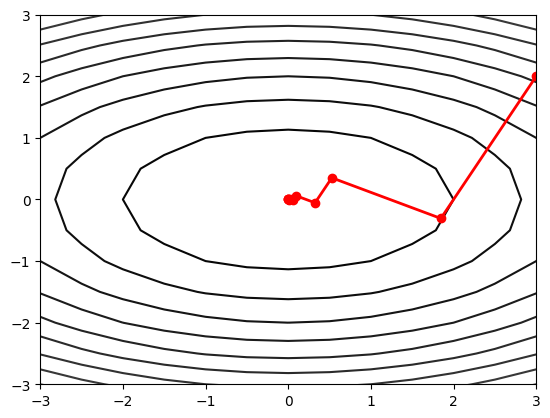

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Create Mesh
h=0.5
x=np.arange(-6, 6+h, h)
y=np.arange(-6, 6+h, h)
X, Y = np.meshgrid(x, y)
Fquad = X**2 + 3*Y**2

# Initial guess
x = [3]
y = [2]
f = [x[0]**2 + 3*y[0]**2]

# Iterate for 10 steps or until convergence
for j in range(10):
    del_ = (x[j]**2 + 9*y[j]**2) / (2*x[j]**2 + 54*y[j]**2)
    x.append((1-2*del_)*x[j])
    y.append((1-6*del_)*y[j])
    f.append(x[j+1]**2 + 3*y[j+1]**2)
    if abs(f[j+1]-f[j]) < 10**(-6):
        break

# Plot the contour and the path of the optimization
plt.figure()
plt.contour(X, Y, Fquad, 40, cmap='gray')
plt.plot(x, y, 'ro-', linewidth=2)
plt.axis([-3, 3, -3, 3])
plt.show()

# Solution of Over-determined system


In [ ]:
import cvxpy as cp #python convex optimization

C:\Users\David\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 60 times so far.

  warnings.warn(msg, UserWarning)
C:\Users\David\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 61 times s

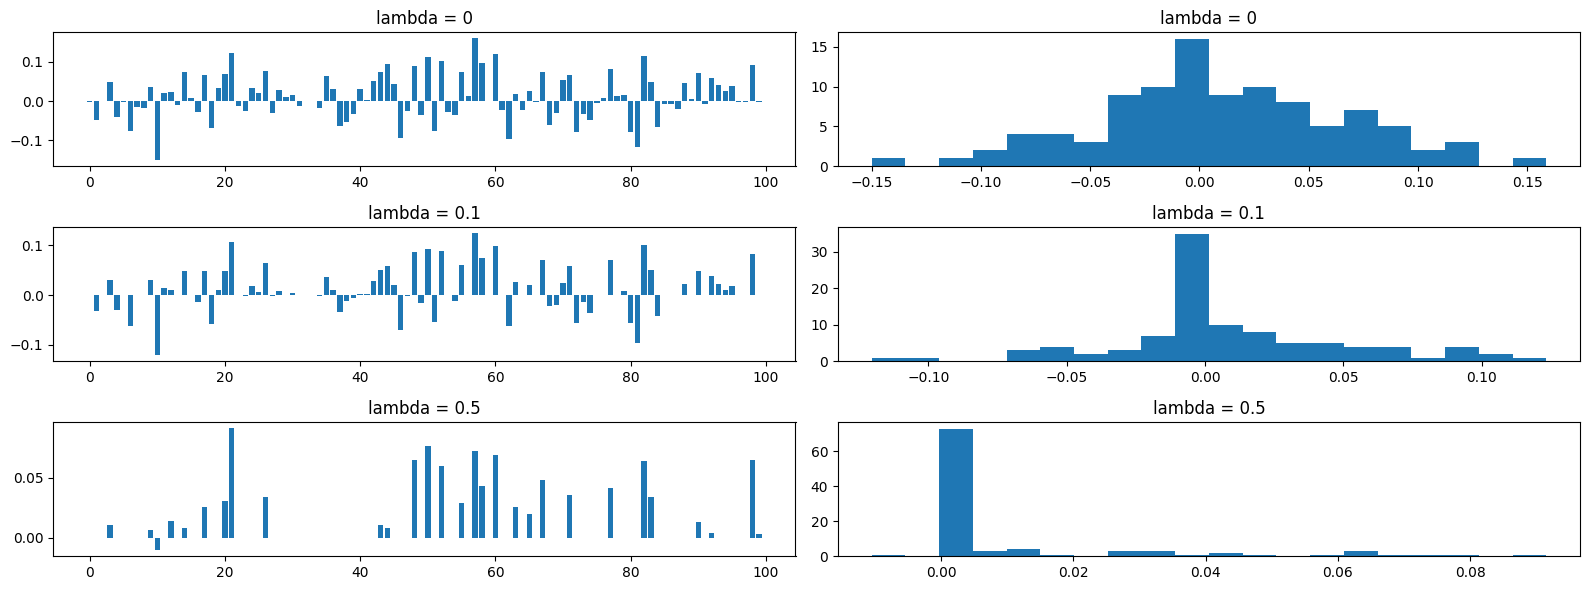

In [60]:
n = 500
m = 100
A = np.random.rand(n, m)
b = np.random.rand(n)
lam = [0, 0.1, 0.5]

fig, axs = plt.subplots(3, 2, figsize=(16, 6))
for j in range(3):
    x = cp.Variable(m)
    objective = cp.Minimize(cp.norm(A*x-b,2) + lam[j]*cp.norm(x,1))
    prob = cp.Problem(objective)
    prob.solve()
    axs[j, 0].bar(range(m), x.value)
    axs[j, 1].hist(x.value, bins=20)
    if j ==0:
        axs[j, 0].set_title("lambda = 0")
        axs[j, 1].set_title("lambda = 0")
    elif j ==1:
        axs[j, 0].set_title("lambda = 0.1")
        axs[j, 1].set_title("lambda = 0.1")
    else:
        axs[j, 0].set_title("lambda = 0.5")
        axs[j, 1].set_title("lambda = 0.5")
plt.tight_layout()
plt.show()


# Solution of Under-determined system


C:\Users\David\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 65 times so far.

  warnings.warn(msg, UserWarning)


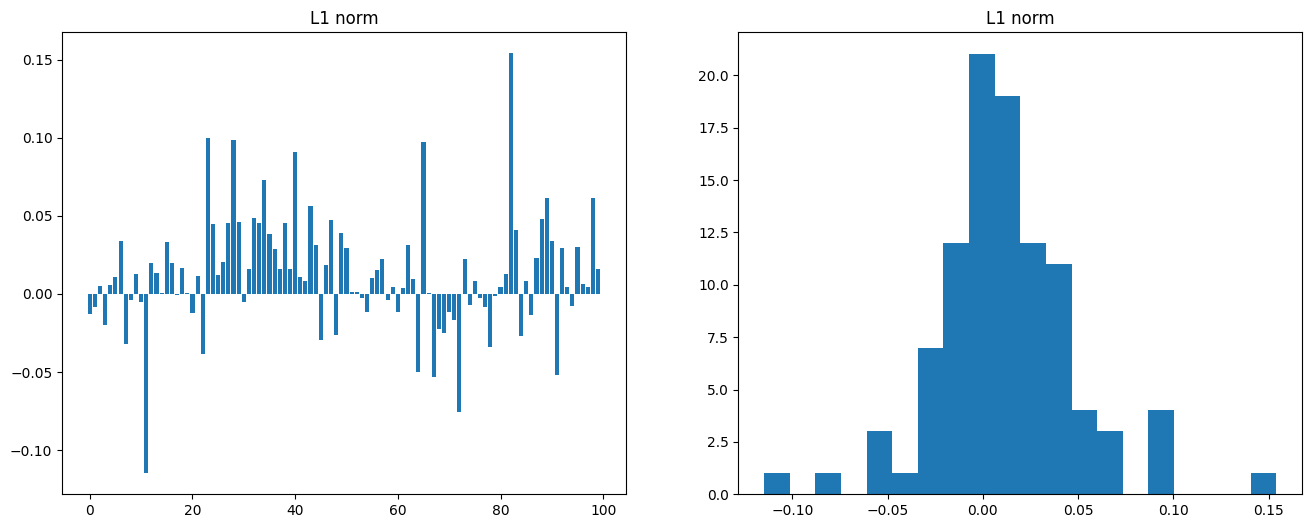

C:\Users\David\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 66 times so far.

  warnings.warn(msg, UserWarning)


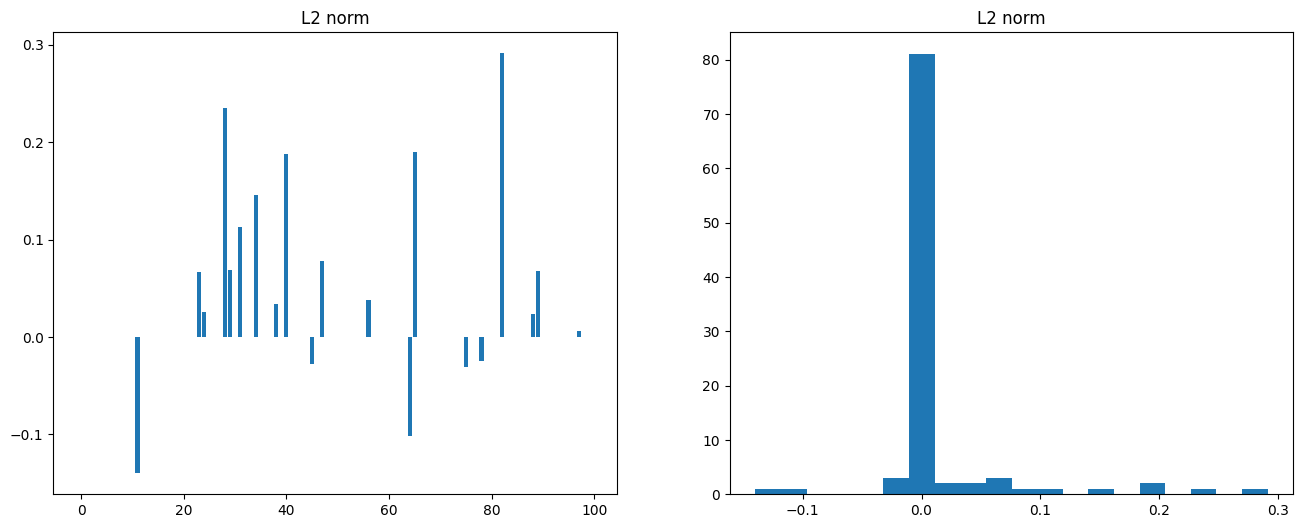

In [62]:
n = 20
m = 100
A = np.random.rand(n, m)
b = np.random.rand(n)
lam = [0, 0.1, 0.5]

for j in range(2):
    x = cp.Variable(m)
    objective = cp.Minimize(cp.norm(A*x-b,2) + lam[j]*cp.norm(x,1))
    prob = cp.Problem(objective)
    prob.solve()
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    axs[0].bar(range(m), x.value)
    axs[1].hist(x.value, bins=20)
    if j ==0:
        axs[0].set_title("L1 norm")
        axs[1].set_title("L1 norm")
    else:
        axs[0].set_title("L2 norm")
        axs[1].set_title("L2 norm")
    plt.show()
